# **Exploratory Data Analysis & Model Experimenting**

Predict whether tomorrow will rain or not based on today's weather data

Anggota Kelompok:

1.   2440016804 - Rio Pramana
2.   2440087214 - Debora
3.   2440030323 - Enrico Fernandez

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('./weatherAUS.csv')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Data Wrangling & EDA**

In [ ]:
df.shape

(145460, 23)

In [ ]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Univariate Analysis

In [ ]:
#Check missing values
df['RainTomorrow'].isnull().sum()

3267

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

We cannot afford having missing values on the target variable. Because it is only a small amount of data, we'll drop rows that has missing values for the target variable (RainTomorrow)

In [ ]:
df.dropna(subset = ['RainTomorrow'], inplace=True)
df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

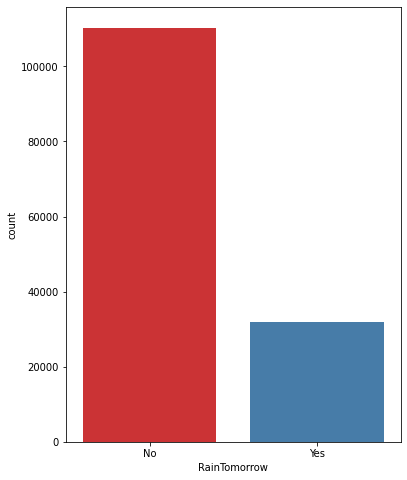

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

df[categorical].head()

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [ ]:
df[categorical].isna().sum().to_frame('number of null values')

,number of null values
Date,0
Location,0
WindGustDir,9330
WindDir9am,10013
WindDir3pm,3778
RainToday,1406
RainTomorrow,0


Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [ ]:
# Check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', df[var].nunique(), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


Feature Engineering variable Date

In [ ]:
# Convert date to Datetime datatype

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Separate date feature to 3 attributes

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# Remove date

df.drop('Date',inplace= True,axis=1)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
new_categorical = df.select_dtypes(include=['object'])
new_categorical.head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


Explore Numerical Variables

In [ ]:
numerical = df.select_dtypes(include=['float64','int'])
numerical.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [ ]:
numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
#Check for any duplicate value
df[df.duplicated()]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day


No duplicate values

In [ ]:
numerical.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
numerical_col = [var for var in df.columns if df[var].dtype!='O']
print(round(df[numerical_col].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

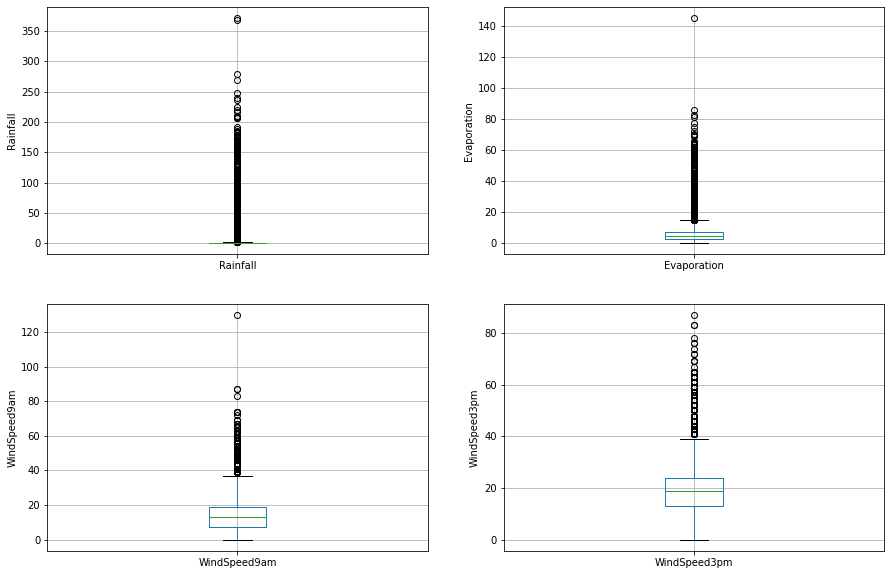

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

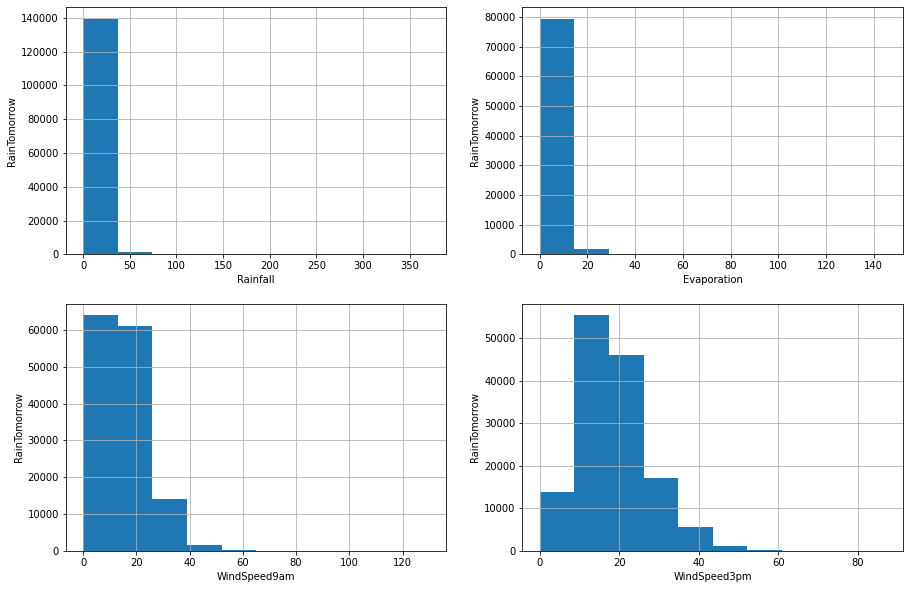

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [ ]:
# Find outliers for Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > Rainfall outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for Evaporation variable
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > Evaporation outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindSpeed9am variable
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindSpeed9am outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindSpeed3pm variable
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindSpeed3pm outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

-1.20 > Rainfall outliers are values > 2.00
-4.60 > Evaporation outliers are values > 14.60
-11.00 > WindSpeed9am outliers are values > 37.00
-3.50 > WindSpeed3pm outliers are values > 40.50


Important point to note :

*   For Rainfall, the minimum and maximum values are 0.0 and 371.0 So, the outliers are values > 2.0
*   For Evaporation, the minimum and maximum values are 0.0 and 145.0 So, the outliers are values > 14.6
*   For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0 So, the outliers are values > 37.0
*   For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0 So, the outliers are values > 40.5

**Multivariate Analysis**

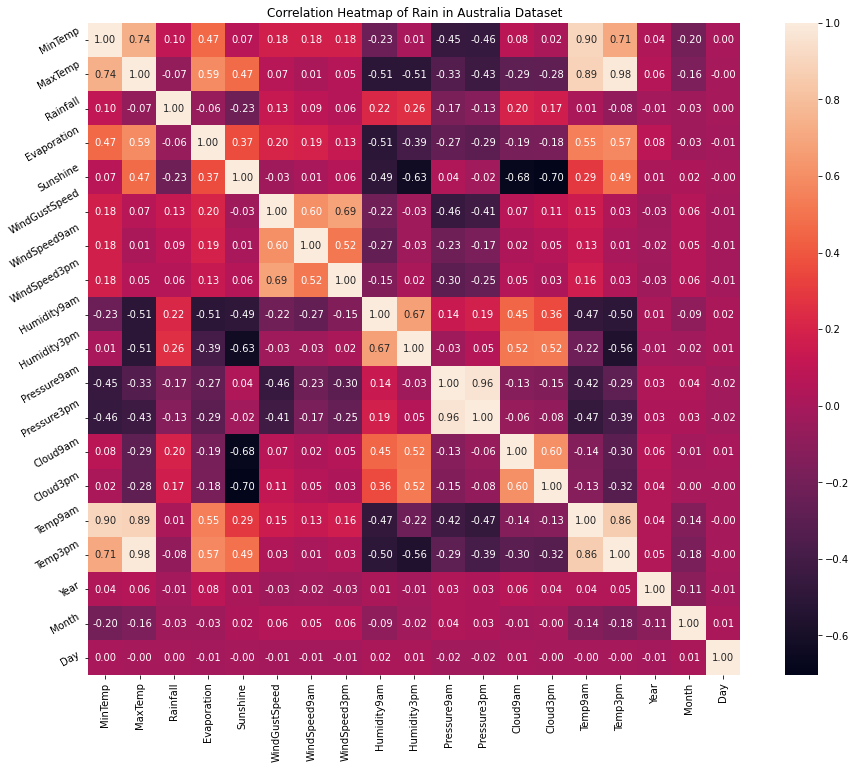

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

min temp <> temp 9am

max temp <> temp 3pm

pressure 9am <> pressure 3pm

In [ ]:
df.drop(['Temp9am','Temp3pm','Pressure9am'],inplace= True,axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

After remove data

In [ ]:
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.1,8.0,NaN,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1007.8,NaN,NaN,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1008.7,NaN,2.0,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1012.8,NaN,NaN,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1006.0,7.0,8.0,No,No,2008,12,5


**Splitting training and test dataset**


In [ ]:
#Extract independent and dependent variables
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((113754, 21), (28439, 21))

**Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.



In [ ]:
# display categorical and numerical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
categorical, numerical

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Year',
  'Month',
  'Day'])

In [ ]:
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Year                 0
Month                0
Day                  0
dtype: int64

Filling missing values

Assumption

I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [ ]:
#replace missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Year             0
Month            0
Day              0
dtype: int64

No more missing values for numerical data

In [ ]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

Location          0
WindGustDir    1923
WindDir9am     2035
WindDir3pm      770
RainToday       267
dtype: int64

In [ ]:
#replace missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [ ]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

No more missing values for categorical data

In [ ]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

Engineering outliers in numerical variables

We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 2.0)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 14.6)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 37.0)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 40.5)

In [ ]:
X_train.shape

(113754, 21)

In [ ]:
#Check .max() for these values
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.480576,5.103081,8.041154,39.884074,13.894413,18.534469,68.867486,51.509547,1015.241101,4.651801,4.703588,2012.759727,6.404021,15.710419
std,6.388279,7.094149,0.789186,2.605389,2.769480,13.116959,8.534160,8.438286,18.935587,20.530723,6.675168,2.292726,2.117847,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1011.000000,3.000000,4.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,5.000000,5.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1019.400000,6.000000,6.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,2.000000,14.600000,14.500000,135.000000,37.000000,40.500000,100.000000,100.000000,1039.600000,9.000000,8.000000,2017.000000,12.000000,31.000000


In [ ]:
X_test[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Year,Month,Day
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,12.153835,23.177960,0.482299,5.078413,8.046566,40.064313,13.939238,18.650726,68.821231,51.440522,1015.297999,4.640634,4.698935,2012.755723,6.396638,15.733746
std,6.391574,7.171085,0.790224,2.569969,2.770314,13.234148,8.620335,8.482636,18.920495,20.538509,6.708235,2.300889,2.122408,2.544643,3.421386,8.803594
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,978.200000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1011.100000,3.000000,4.000000,2010.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,5.000000,5.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1019.500000,6.000000,6.000000,2015.000000,9.000000,23.000000
max,31.400000,46.700000,2.000000,14.600000,14.300000,130.000000,37.000000,40.500000,100.000000,100.000000,1038.200000,8.000000,9.000000,2017.000000,12.000000,31.000000


All 4 columns who had outliers are now capped according to their respective upper boundary

In [ ]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Encoding Categorical Variables**

In [ ]:
# encode RainToday variable using category encoders because RainToday values are binary
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,65.0,55.0,1013.4,5.0,5.0,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,71.0,59.0,1013.1,7.0,5.0,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,6.0,2.0,1013.6,1.0,1.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,59.0,53.0,1010.8,2.0,3.0,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,72.0,53.0,1015.2,5.0,8.0,0,1,2012,11,8


In [ ]:
#Creating X_train dataset that has been encoded using pd.get_dummies
X_train1 = X_train.copy()
X_train1 = pd.concat([X_train1[numerical], X_train1[['RainToday_0', 'RainToday_1']]], axis=1)
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
#Creating X_test dataset that has been encoded using pd.get_dummies
X_test1 = X_test.copy()
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)
X_test1 = pd.concat([X_test1[numerical], X_test1[['RainToday_0', 'RainToday_1']]], axis=1)

In [ ]:
X_test1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Year', 'Month',
       'Day', 'RainToday_0', 'RainToday_1'],
      dtype='object')

In [ ]:
X_test.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
127049,10.1,15.4,2.0,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
136649,6.8,14.3,2.0,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


**Feature Scaling**

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.480576,5.103081,8.041154,39.884074,13.894413,18.534469,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,0.789186,2.605389,2.769480,13.116959,8.534160,8.438286,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,2.000000,14.600000,14.500000,135.000000,37.000000,40.500000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
col1 = X_train1.columns
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)
X_train1 = pd.DataFrame(X_train1, columns=[col1])
X_test1 = pd.DataFrame(X_test1, columns=[col1])

In [ ]:
X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.240288,0.349526,0.554562,0.262667,0.375525,0.457641,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.394593,0.178451,0.190999,0.101682,0.230653,0.208353,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.273973,0.565517,0.193798,0.189189,0.320988,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.328767,0.586207,0.255814,0.351351,0.469136,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.300000,0.369863,0.600000,0.310078,0.513514,0.592593,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Model Selection and Training**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = lr.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
#Check accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8499


In [ ]:
y_pred_train = lr.predict(X_train)
#Compare test set accuracy with training set accuracy
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8463


The accuracy score for training set and test set are very similar, so it could be said that there are no overfitting in this case

Test for bigger C value

In [ ]:
lr100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
lr100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
print('Training set score: {:.4f}'.format(lr100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lr100.score(X_test, y_test)))

Training set score: 0.8462
Test set score: 0.8501


We got slightly higher value, so we can conclude that the bigger the C value is, the better the accuracy

*Compare model accuracy with null accuracy*

So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [ ]:
# check class distribution in test set
y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

In [ ]:
# check null accuracy score
null_accuracy = (22067/(22067+6372))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 20,
             'max_features': "sqrt",
            'splitter':'best',
            'max_leaf_nodes':None,
             'random_state':42}
dt = DecisionTreeClassifier(**params_dt)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', random_state=42)

In [ ]:
y_pred_test_dt = dt.predict(X_test)
y_pred_test_dt

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
#Check accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_dt)))

Model accuracy score: 0.8127


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_test_rf = rf.predict(X_test)
y_pred_test_rf

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
#Check accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_rf)))

Model accuracy score: 0.8589


In [ ]:
rf1 = RandomForestClassifier(random_state = 0)
rf1.fit(X_train1, y_train)
y_pred11 = rf1.predict(X_test1)
#Check accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred11)))

Model accuracy score: 0.8581


Hyperparameters Tuning using GridSearchCV

Our best model is Random Forest Classifier with almost 86% accuracy, so we will try to find the best parameters to use for the model to improve the accuracy even more



In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
halvedCV_rf = HalvingGridSearchCV(rf, param_grid, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halvedCV_rf.fit(X_train, y_train)

HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': [4, 5, 6, 7, 8],
                                'max_features': ['auto', 'sqrt', 'log2'],
                                'n_estimators': [200, 500]},
                    scoring='roc_auc')

In [ ]:
halvedCV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
halvedCV_rf.best_score_

0.8535972850146702

**Compare ROC_AUC score between model and halvedCV model**

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_cv = halvedCV_rf.predict(X_test)
ROC_AUC_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
ROC_AUC_rf1 = roc_auc_score(y_test, rf1.predict_proba(X_test1)[:,1])

ROC_AUC_cv = roc_auc_score(y_test, halvedCV_rf.predict_proba(X_test)[:,1])
print('ROC AUC RF: {:.4f}'.format(ROC_AUC_rf))
print('ROC AUC RF without categorical: {:.4f}'.format(ROC_AUC_rf1))
print('ROC AUC HalvedCV: {:.4f}'.format(ROC_AUC_cv))

ROC AUC RF: 0.8888
ROC AUC RF without categorical: 0.8847
ROC AUC HalvedCV: 0.8576


ROC AUC of our original RF model is better than the Halved CV RF model because it is closer to 1

**Confusion Matrix of original RF model**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_rf)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21235   832]
 [ 3180  3192]]

True Positives(TP) =  21235

True Negatives(TN) =  3192

False Positives(FP) =  832

False Negatives(FN) =  3180


In [ ]:
cm1 = confusion_matrix(y_test, y_pred11)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP) = ', cm1[0,0])
print('\nTrue Negatives(TN) = ', cm1[1,1])
print('\nFalse Positives(FP) = ', cm1[0,1])
print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[21137   930]
 [ 3105  3267]]

True Positives(TP) =  21137

True Negatives(TN) =  3267

False Positives(FP) =  930

False Negatives(FN) =  3105


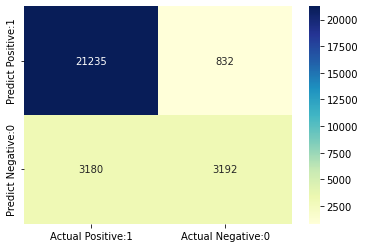

In [ ]:
#Visualize confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report of original RF model**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rf))
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.79      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.78      0.51      0.62      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.74      0.77     28439
weighted avg       0.85      0.86      0.85     28439



**Adjusting threshold to increase accuracy**

In [ ]:
# store the predicted probabilities for class 1 - Probability of rain
y_pred_thres = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

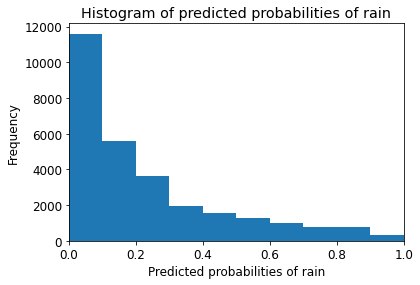

In [ ]:
#Visualize a histogram of predicted probabilities
plt.rcParams['font.size'] = 12
plt.hist(y_pred_thres, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

Default threshold for binary classification is 0.5, that means it is predicted to rain tomorrow if the probability of rain is > 0.5

Based on the histogram, there are only a small amount of data that has probability > 0.5

We will try to adjust the threshold level to find which threshold value result in the best model performance

In [ ]:
#Adjusting threshold (0.1 - 0.9)
from sklearn.preprocessing import binarize
for i in range(1,10):
    
    cm1=0
    
    y_pred1 = rf.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold = i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[11942 10125]
 [  370  6002]] 

 with 17944 correct predictions,  

 10125 Type I errors( False Positives),  

 370 Type II errors( False Negatives),  

 Accuracy score:  0.6309645205527621 

 Sensitivity:  0.9419334588826114 

 Specificity:  0.5411700729596229 



With 0.2 threshold the Confusion Matrix is  

 [[16616  5451]
 [  961  5411]] 

 with 22027 correct predictions,  

 5451 Type I errors( False Positives),  

 961 Type II errors( False Negatives),  

 Accuracy score:  0.7745349695840219 

 Sensitivity:  0.8491839296924043 

 Specificity:  0.7529795622422623 



With 0.3 threshold the Confusion Matrix is  

 [[19102  2965]
 [ 1687  4685]] 

 with 23787 correct predictions,  

 2965 Type I errors( False Positives),  

 1687 Type II errors( False Negatives),  

 Accuracy score:  0.836421815113049 

 Sensitivity:  0.735247959824231 

 Specificity:  0.865636470748176 



With 0.4 threshold the Confusion Matrix is  

 [[20454  1613]


From the result, we can see that different threshold value results in different sensitivity and specificity. But the best accuracy score is retrieved by setting the threshold value to 0.5 (default)

**Check Feature Importance**

In [ ]:
importances = rf.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

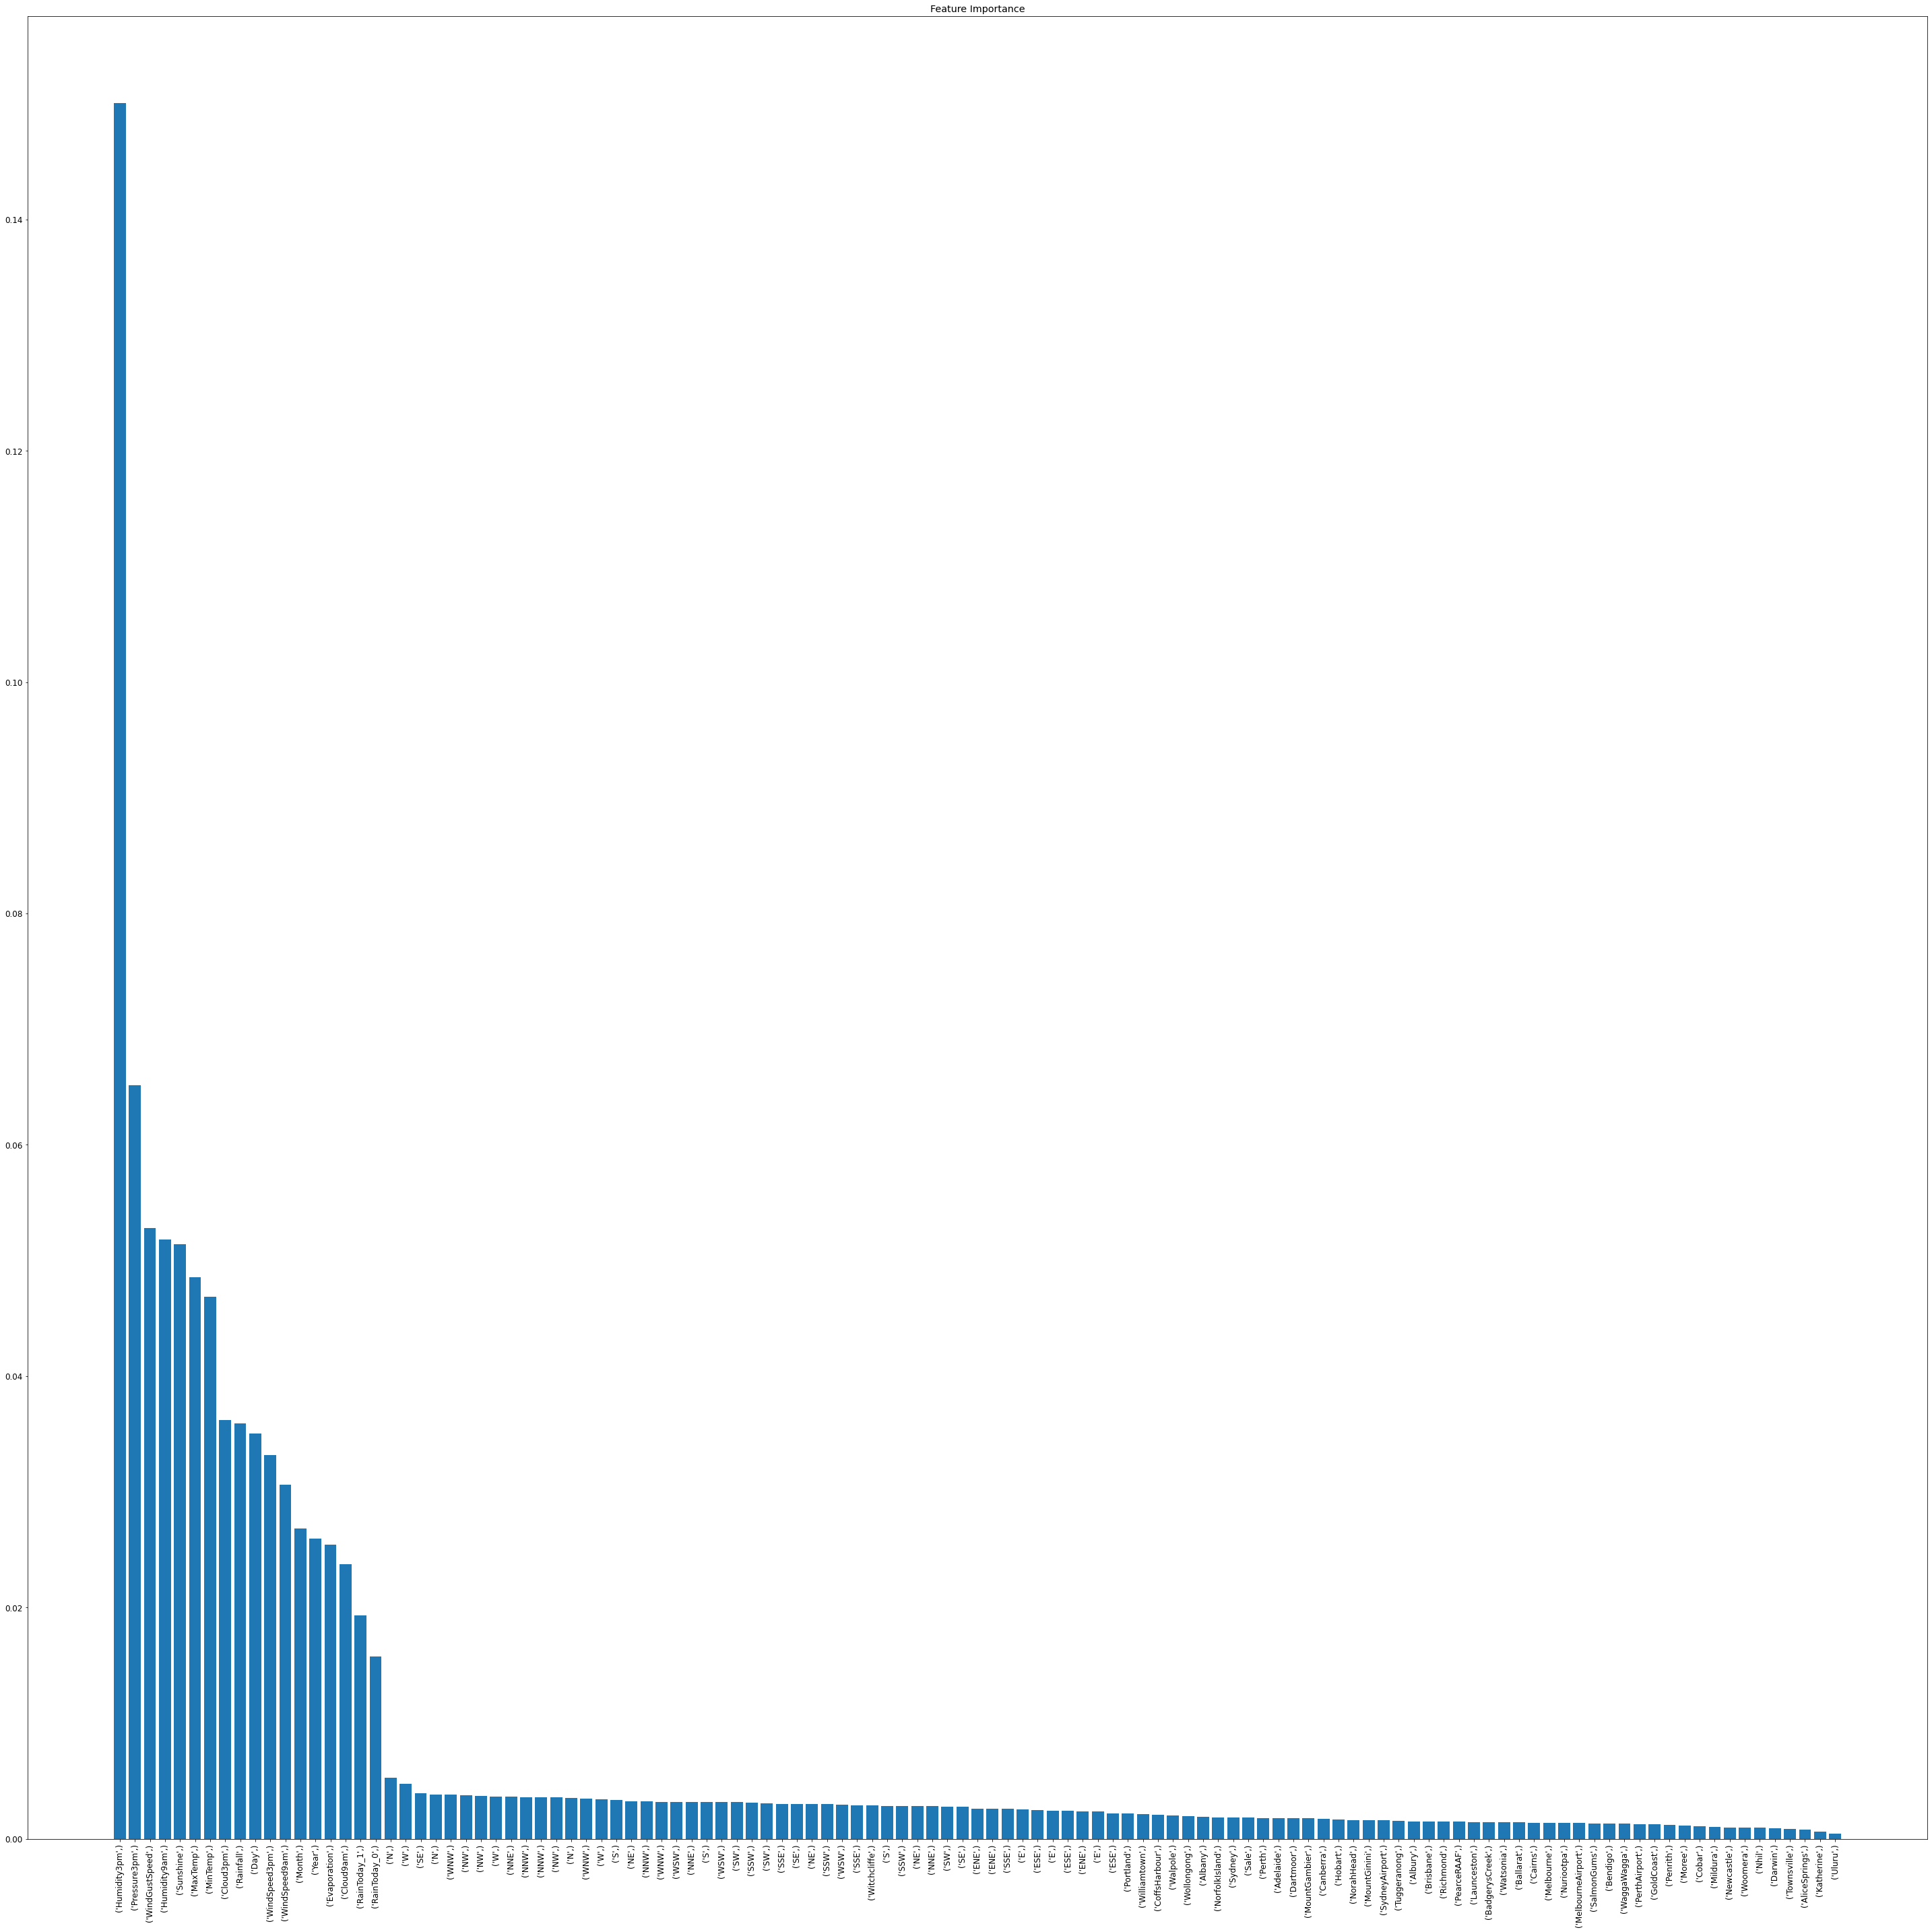

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in sorted_indices[:20]:
  print(X_train.columns[i])

('Humidity3pm',)
('Pressure3pm',)
('WindGustSpeed',)
('Humidity9am',)
('Sunshine',)
('MaxTemp',)
('MinTemp',)
('Cloud3pm',)
('Rainfall',)
('Day',)
('WindSpeed3pm',)
('WindSpeed9am',)
('Month',)
('Year',)
('Evaporation',)
('Cloud9am',)
('RainToday_1',)
('RainToday_0',)
('N',)
('W',)


**Done**